In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import joblib
from sklearn.metrics import confusion_matrix

In [2]:
heart_df=pd.read_csv("framingham.csv")


In [3]:
heart_df.drop(columns=['education'],inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_df.rename(columns={'male':'Gender'},inplace=True)
heart_df.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
heart_df.isnull().sum()

Gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [7]:
heart_df.dropna(axis=0,inplace=True)
heart_df.shape

(3749, 15)

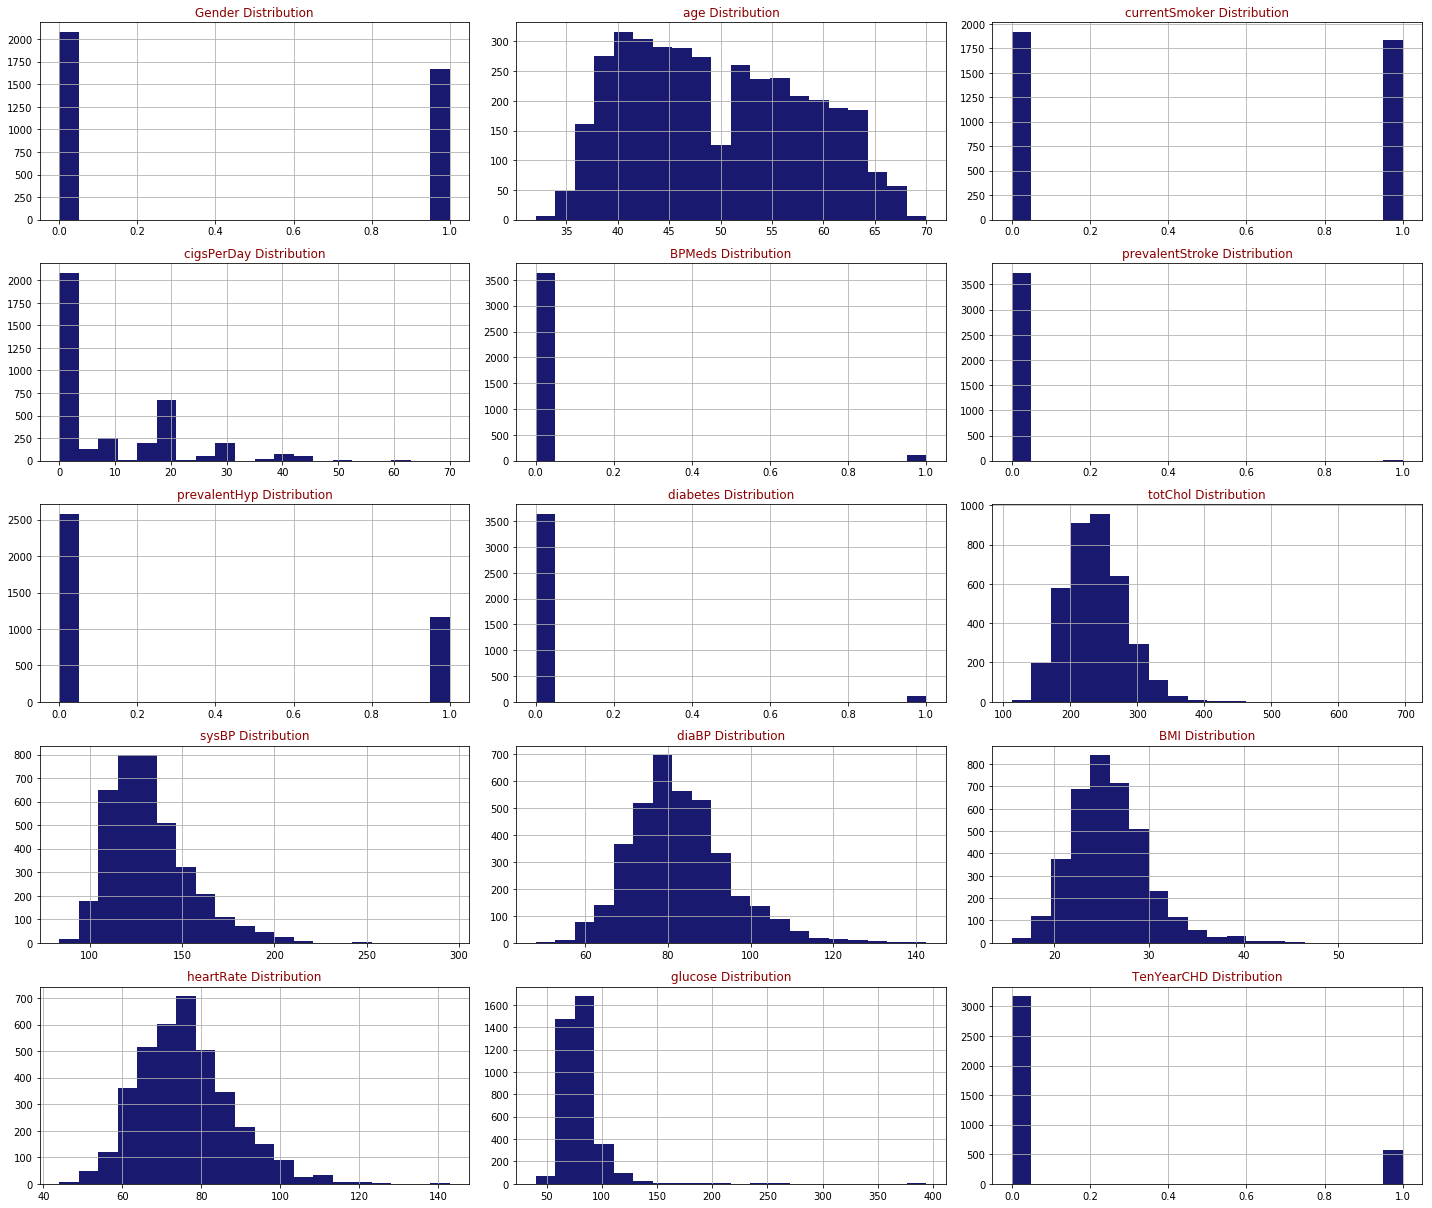

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)


In [9]:
heart_df.TenYearCHD.value_counts()


0    3177
1     572
Name: TenYearCHD, dtype: int64

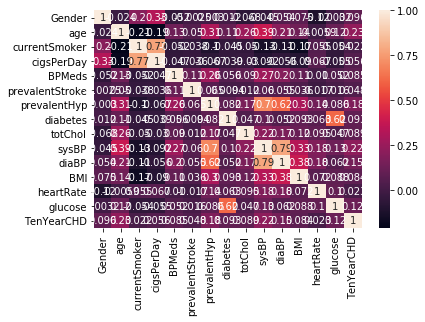

In [10]:
sn.heatmap(heart_df.corr(),annot=True)

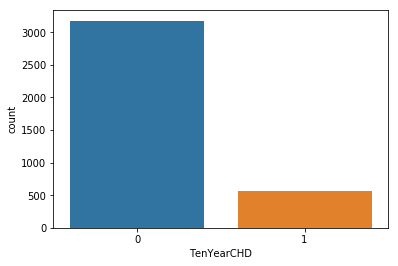

In [11]:
sn.countplot(x='TenYearCHD',data=heart_df)


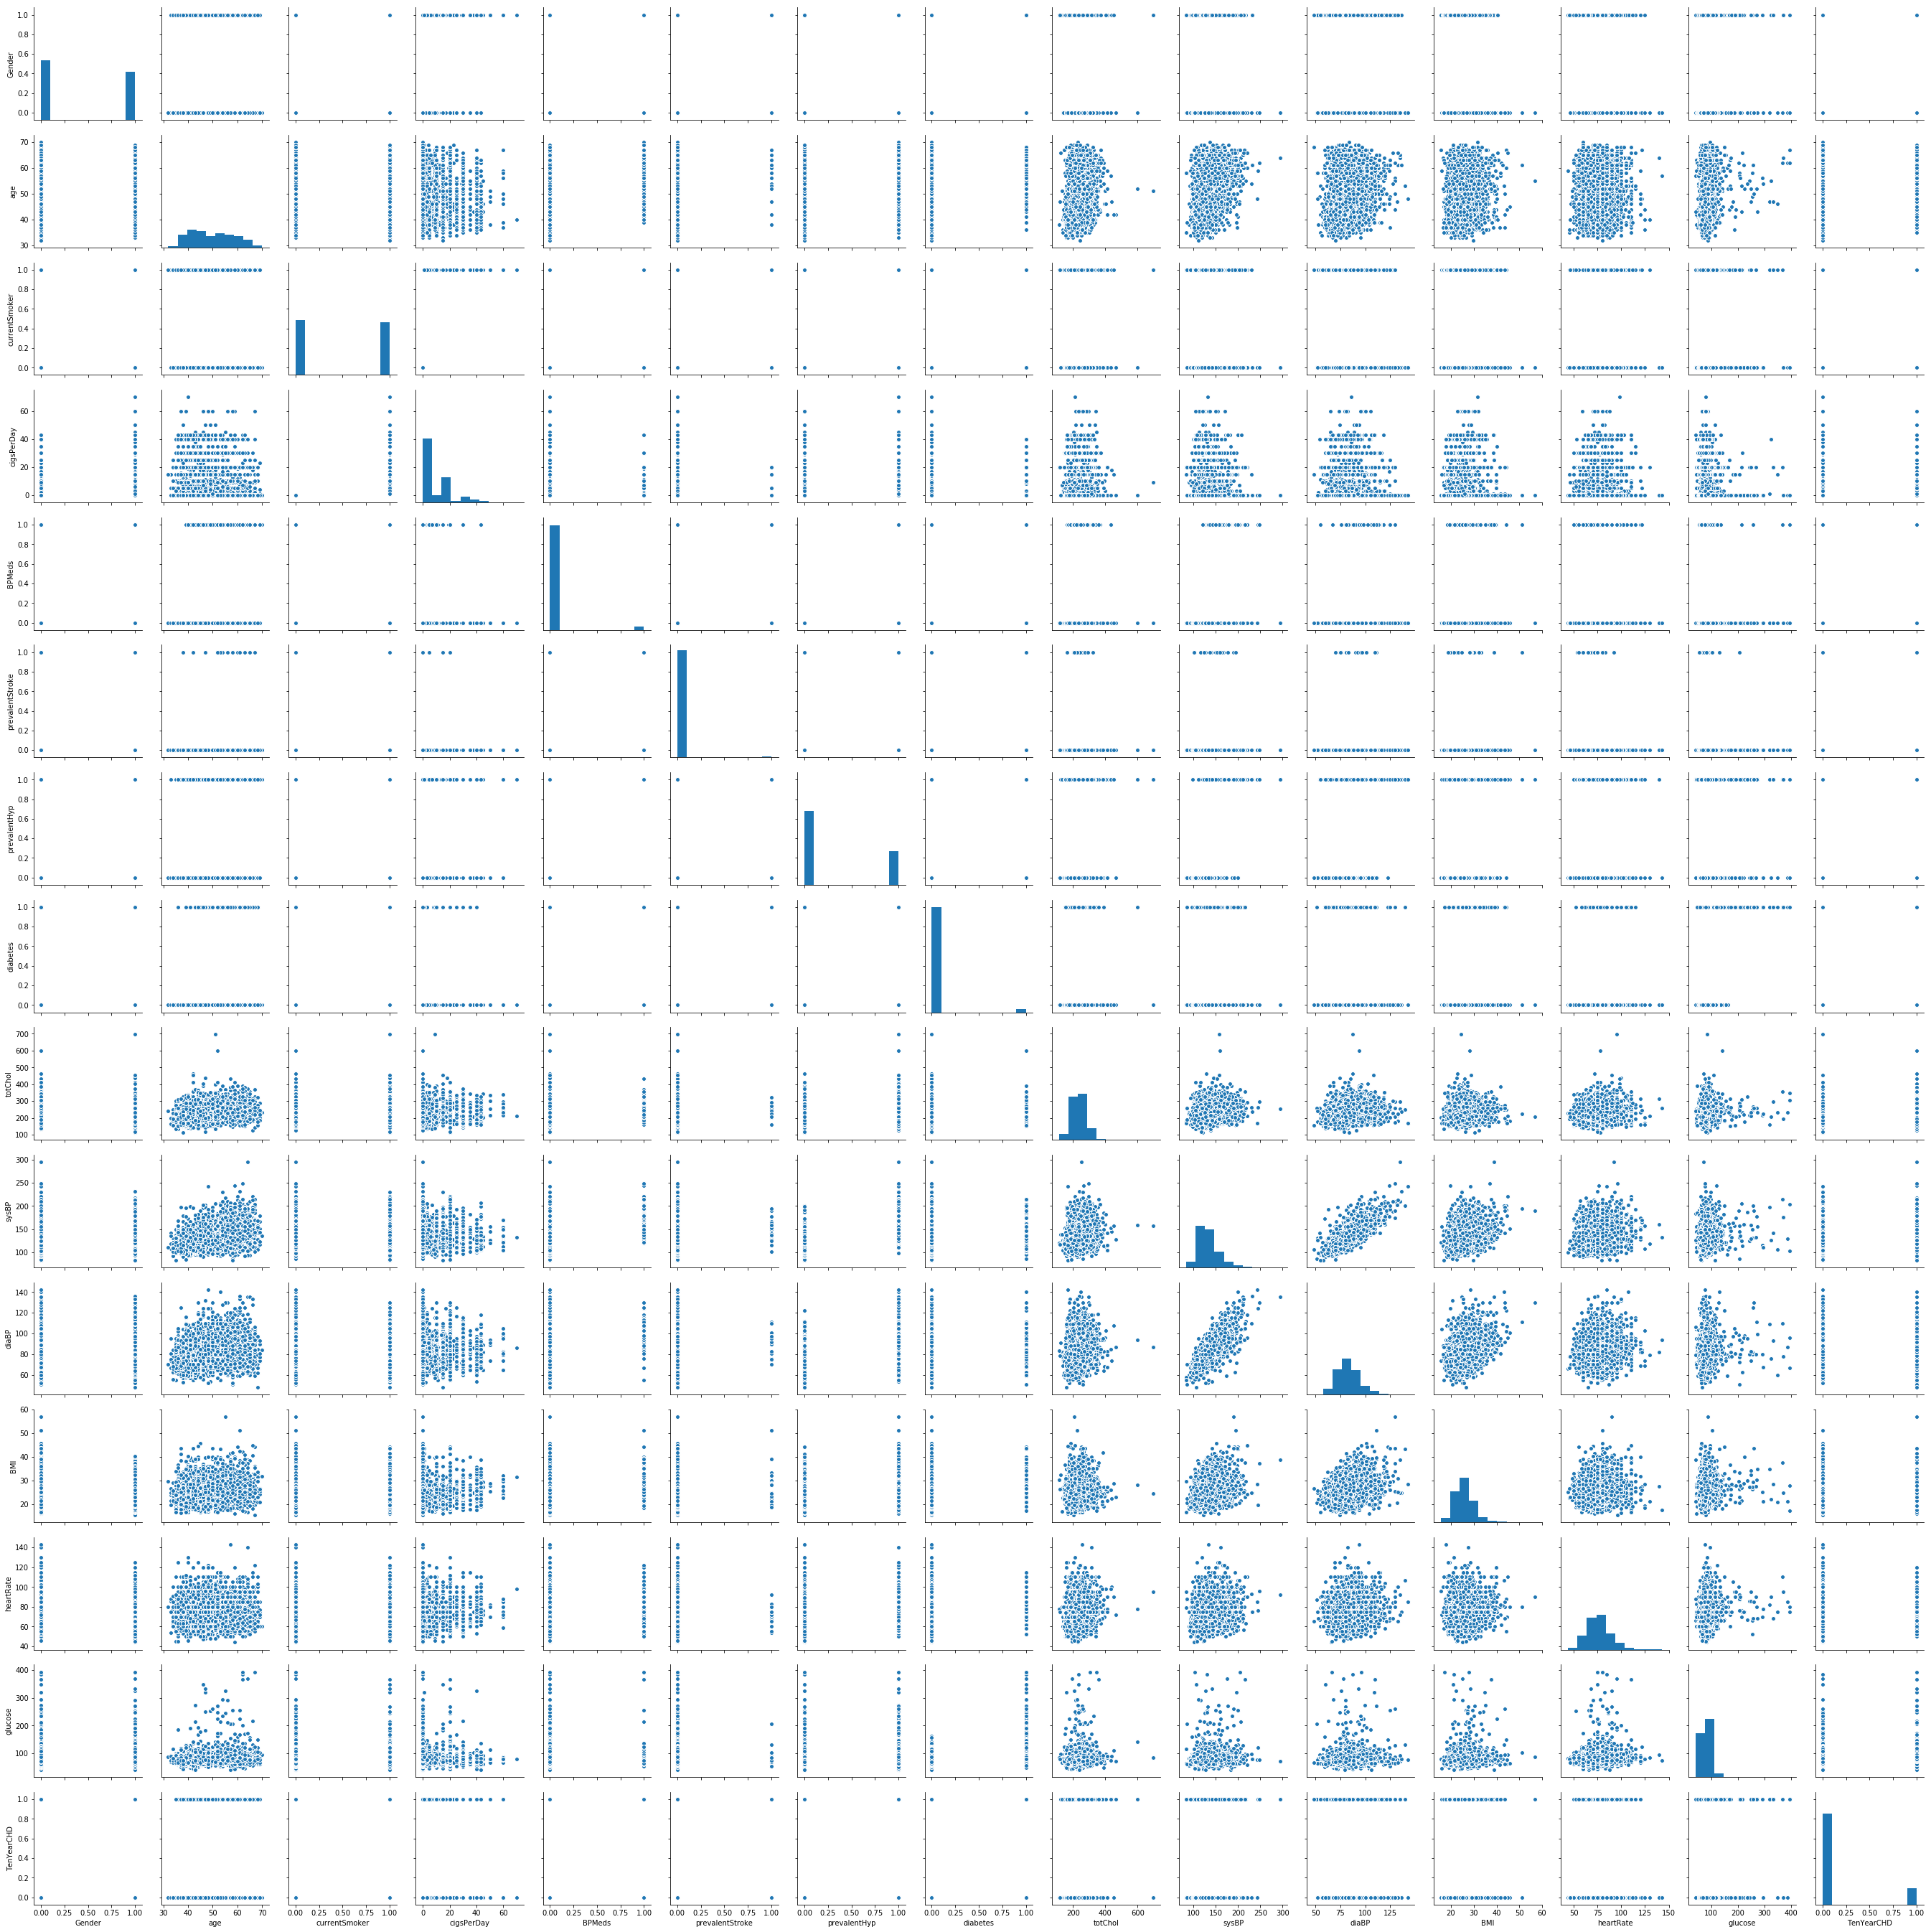

In [12]:
sn.pairplot(data=heart_df)


In [13]:
heart_df.corr()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gender,1.000000,-0.024120,0.203861,0.326780,-0.052359,-0.002509,0.002987,0.011847,-0.067506,-0.044638,0.053602,0.074630,-0.115091,0.003236,0.096056
age,-0.024120,1.000000,-0.211427,-0.188611,0.131629,0.049990,0.305735,0.109257,0.260967,0.388558,0.205774,0.136093,-0.005857,0.118426,0.231414
currentSmoker,0.203861,-0.211427,1.000000,0.773166,-0.051828,-0.037582,-0.104753,-0.045319,-0.050025,-0.133098,-0.113915,-0.165165,0.054545,-0.054180,0.021722
cigsPerDay,0.326780,-0.188611,0.773166,1.000000,-0.046601,-0.035711,-0.066911,-0.039411,-0.030427,-0.092292,-0.056108,-0.090032,0.066726,-0.055165,0.056064
BPMeds,-0.052359,0.131629,-0.051828,-0.046601,1.000000,0.111595,0.263089,0.056322,0.089554,0.269507,0.199400,0.105090,0.010232,0.052442,0.084704
prevalentStroke,-0.002509,0.049990,-0.037582,-0.035711,0.111595,1.000000,0.065208,0.009417,0.012259,0.060431,0.055232,0.035550,-0.016675,0.015779,0.047669
prevalentHyp,0.002987,0.305735,-0.104753,-0.066911,0.263089,0.065208,1.000000,0.082096,0.165049,0.697960,0.616655,0.303382,0.142512,0.085959,0.178779
diabetes,0.011847,0.109257,-0.045319,-0.039411,0.056322,0.009417,0.082096,1.000000,0.047374,0.104415,0.051841,0.093061,0.063383,0.616084,0.093190
totChol,-0.067506,0.260967,-0.050025,-0.030427,0.089554,0.012259,0.165049,0.047374,1.000000,0.216572,0.170353,0.119398,0.094802,0.046769,0.089408
sysBP,-0.044638,0.388558,-0.133098,-0.092292,0.269507,0.060431,0.697960,0.104415,0.216572,1.000000,0.785909,0.330569,0.181482,0.132928,0.220170


In [14]:
import sklearn
x=heart_df[['age','Gender','cigsPerDay','BPMeds','totChol','sysBP','glucose']]
y=heart_df['TenYearCHD']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
# Fit the model
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)


0.8453333333333334

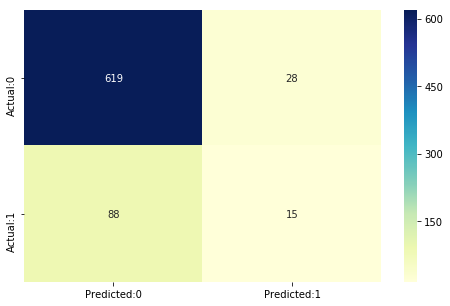

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [19]:
#Save model to disk

In [20]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
[a,b,c,d,e,f,g]=eval(input('age')),eval(input('Sex_male')),eval(input('cigsPerDay')),eval(input('BPMeds')),eval(input('totChol')),eval(input('sysbp')),eval(input('glucose'))
pred=xgb.predict([[a,b,c,d,e,f,g]])
if pred[0]==1:
    print("you have a chance of heart attack!!please consult with your doctor")
else:
    print("congratulation!!you have no problem in your heart")